In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [29]:
print(os.getcwd())
# organize the data
meta_data = "logs_files/meta_data.xlsx"
meta_data = pd.read_excel(meta_data)

# folder_name
meta_data["ID"] = meta_data["ID"].apply(lambda x: "case" + str(x))
meta_data["Size"] = meta_data["Size"].apply(lambda x: int(x.split("mm")[0]))
meta_data.to_csv("logs_files/new_meta_data.csv", index=False)
meta_data.head()


d:\math\ai security\final project


,ID,Number of frames,Shape,Size,Location,Pathological diagnosis
0,case1,527,Is,6,Cecum,Low-grade adenoma
1,case2,1313,Is,18,Rectum,High-grade adenoma
2,case3,292,IIa,3,Ascending colon,Low-grade adenoma
3,case4,80,Is,4,Sigmoid colon,Low-grade adenoma
4,case5,930,IIa,3,Transverse colon,Low-grade adenoma


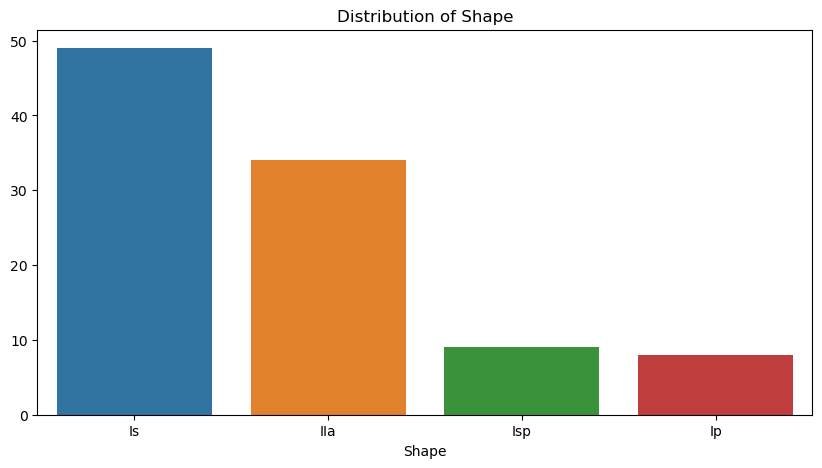

Shape
Is     49
IIa    34
Isp     9
Ip      8
Name: count, dtype: int64


In [30]:
# show the distribution of "shape"
shape = meta_data["Shape"].value_counts()
# plot the distribution of "shape"
plt.figure(figsize=(10, 5))
sns.barplot(x=shape.index, y=shape.values)
plt.title("Distribution of Shape")
plt.show()

print(shape)

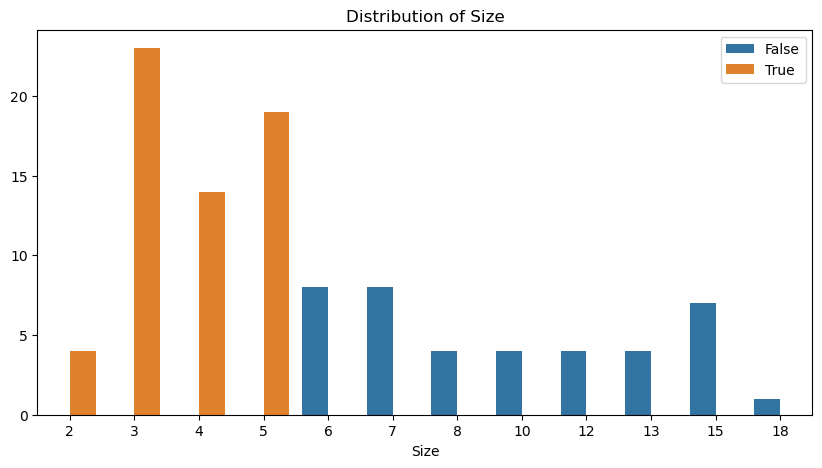

Size
2      4
3     23
4     14
5     19
6      8
7      8
8      4
10     4
12     4
13     4
15     7
18     1
Name: count, dtype: int64


In [31]:
# the distribution of "Size"
Size = meta_data["Size"].value_counts()
# plot the distribution of "Size"; less than or equal to 5 is small polyp and larger than 5 is large polyp
plt.figure(figsize=(10, 5))
# add hue to distinguish small and large polyp
sns.barplot(x=Size.index, y=Size.values, hue=(Size.index <= 5))
# add legend
plt.title("Distribution of Size")
plt.show()

print(Size.sort_index())

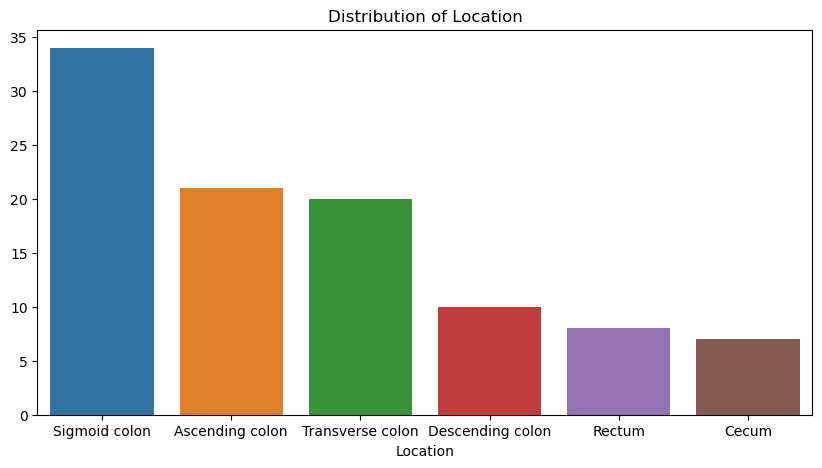

Location
Sigmoid colon       34
Ascending colon     21
Transverse colon    20
Descending colon    10
Rectum               8
Cecum                7
Name: count, dtype: int64


In [32]:
# distribution of "Location"
Location = meta_data["Location"].value_counts()
# plot the distribution of "Location"
plt.figure(figsize=(10, 5))
sns.barplot(x=Location.index, y=Location.values)
plt.title("Distribution of Location")
plt.show()

print(Location)

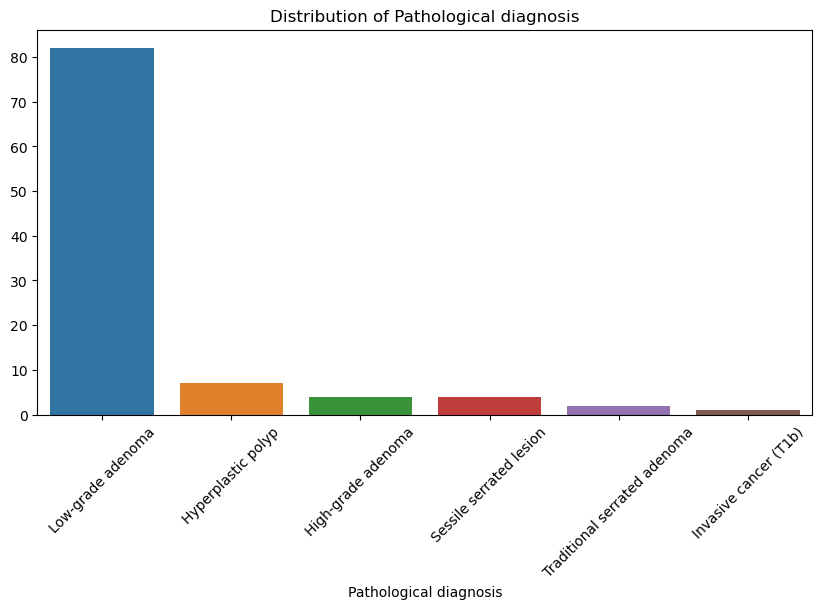

Pathological diagnosis
Low-grade adenoma               82
Hyperplastic polyp               7
High-grade adenoma               4
Sessile serrated lesion          4
Traditional serrated adenoma     2
Invasive cancer (T1b)            1
Name: count, dtype: int64


In [33]:
# distribution of "Pathological diagnosis"
diagnosis = meta_data["Pathological diagnosis"].value_counts()
# plot the distribution of "Pathological diagnosis"
plt.figure(figsize=(10, 5))
sns.barplot(x=diagnosis.index, y=diagnosis.values)
# rotate the x-axis label
plt.xticks(rotation=45)
plt.title("Distribution of Pathological diagnosis")
plt.show()

print(diagnosis)

In [34]:
# merge with similar classes
meta_data["Diagnosis"] = meta_data["Pathological diagnosis"]
meta_data["Diagnosis"] = meta_data["Diagnosis"].apply(lambda x: "Hyperplastic" if "Hyperplastic" in x else x)
meta_data["Diagnosis"] = meta_data["Diagnosis"].apply(lambda x: "Low-grade" if "serrated" in x else x)
meta_data["Diagnosis"] = meta_data["Diagnosis"].apply(lambda x: "High-grade" if "cancer" in x else x)
meta_data["Diagnosis"] = meta_data["Diagnosis"].apply(lambda x: "High-grade" if "High-grade" in x else x)
meta_data["Diagnosis"] = meta_data["Diagnosis"].apply(lambda x: "Low-grade" if "Low-grade" in x else x)
# merge with similar location
meta_data["Location"] = meta_data["Location"].apply(lambda x: "Ascending colon" if "Cecum" in x else x)
# merge with similar size
meta_data["Size"] = meta_data["Size"].apply(lambda x: "Small" if x <= 5 else "Large")

In [35]:
# get the path, folder and ID of the training samples

def get_data_csv(training_path = "data/SUN-SEG_10/TrainDataset_10/images", output_path = "data/SUN-SEG_10/TrainDataset_10/train_data.csv"):
    ids = []
    images_path = []
    names = []
    folders = []
    file_names = []

    for folder in os.listdir(training_path):
        folder_path = os.path.join(training_path, folder)
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            name = image.split(".")[0]
            id = folder.split("_")[0]
            
            ids.append(id)
            images_path.append(image_path)
            names.append(name)
            folders.append(folder)
            file_names.append(image)

    data = pd.DataFrame({"ID": ids, "folder": folders, "name": names, "path": images_path, "file_name": file_names})
    data.to_csv(output_path, index=False)

In [36]:
training_path = "data/SUN-SEG_10/TrainDataset_10/images"
training_output_path = "data/SUN-SEG_10/train_data.csv"

validation_path = "data/SUN-SEG_10/SUN-SEG_10_val/images"
validation_output_path = "data/SUN-SEG_10/val_data.csv"

test_path = "data/SUN-SEG_10_test/images"
test_output_path = "data/SUN-SEG_10/test_data.csv"

# get the data csv
get_data_csv(training_path, training_output_path)
get_data_csv(validation_path, validation_output_path)
get_data_csv(test_path, test_output_path)

In [37]:
# join the meta data with the training data
train_csv = pd.read_csv(training_output_path)
train_csv = pd.merge(train_csv, meta_data, on="ID", how="left")
train_csv.to_csv("data/SUN-SEG_10/train_data.csv", index=False)

# join the meta data with the validation data
val_csv = pd.read_csv(validation_output_path)
val_csv = pd.merge(val_csv, meta_data, on="ID", how="left")
val_csv.to_csv("data/SUN-SEG_10/val_data.csv", index=False)

# join the meta data with the test data
test_csv = pd.read_csv(test_output_path)
test_csv = pd.merge(test_csv, meta_data, on="ID", how="left")
test_csv.to_csv("data/SUN-SEG_10/test_data.csv", index=False)

In [38]:
# merge the test_csv with the prediction
def merge_prediction(test_csv_path, prediction_path, output_path):
    test_csv = pd.read_csv(test_csv_path)
    prediction = pd.read_csv(prediction_path)
    # modified the file_name in the prediction
    prediction["file_name"] = prediction["file_name"].apply(lambda x: x.split(".")[0]+ ".jpg")
    data = pd.merge(prediction, test_csv, on="file_name", how="left")
    data.to_csv(output_path, index=False)

In [39]:
# get the baseline output with metadata
test_csv_path = "data/SUN-SEG_10/test_data.csv"
baseline_prediction_path = "logs_files/result_map/baseline/dice.csv"
baseline_output_path = "data/SUN-SEG_10/baseline_output.csv"
# get the baseline output with metadata
merge_prediction(test_csv_path, baseline_prediction_path, baseline_output_path)

# get the aug output with metadata
aug_prediction_path = "logs_files/result_map/aug/dice.csv"
aug_output_path = "data/SUN-SEG_10/aug_output.csv"
# get the aug output with metadata
merge_prediction(test_csv_path, aug_prediction_path, aug_output_path)

In [40]:
# here is the metrics for fairness
def get_dice_per_attribute(data, attribute):
    # get the dice for each attribute
    dice = data.groupby(attribute)["dice"].mean()
    return dice

def get_ESSP(overall_dice, dice_per_attribute):
    # get the ESSP for each attribute
    delta = np.sum([np.abs(overall_dice - dice) for dice in dice_per_attribute])
    ESSP = overall_dice / (1 + delta)
    return ESSP

def get_fairness_metrics(data, attribute):
    # get the fairness metrics for each attribute
    dice_per_attribute = get_dice_per_attribute(data, attribute)
    overall_dice = data["dice"].mean()
    ESSP = get_ESSP(overall_dice, dice_per_attribute)
    # turn dice_per_attribute into a form that easy to merge
    # dice_per_attribute = dice_per_attribute.reset_index()
    # print(dice_per_attribute)
    return overall_dice, dice_per_attribute, ESSP

def merge_series(series1, series2):
    # merge two series
    dicts = {f"{key} Dice": [series1[key], series2[key]] for key in series1.index}
    return dicts

In [41]:
# 设置显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.float_format', '{:.4f}'.format)  # 设置浮点数的显示格式
pd.set_option('display.width', 1000)  # 设置打印宽度

In [42]:
# load the prediction data
baseline_output = pd.read_csv(baseline_output_path)
aug_output = pd.read_csv(aug_output_path)
sensitive_attributes = ["Diagnosis", "Size", "Shape", "Location"]

# get the fairness metrics for each attribute
for attribute in sensitive_attributes:
    overall_dice_base, dice_per_attribute_base, ESSP_base = get_fairness_metrics(baseline_output, attribute)
    overall_dice, dice_per_attribute, ESSP = get_fairness_metrics(aug_output, attribute)
    # merge the dice_per_attribute_base and dice_per_attribute
    methods = ["Baseline", "Aug"]
    attrs = [attribute] * 2
    overall_dices = [overall_dice_base, overall_dice]
    ESSPs = [ESSP_base, ESSP]
    dicts = {"Attribute": attrs,  "Method": methods, "ES Dice": ESSPs,"Overall Dice": overall_dices, }
    dice_per_attributes = merge_series(dice_per_attribute_base, dice_per_attribute)
    final_dicts = {**dicts, **dice_per_attributes}
    fairness_metrics = pd.DataFrame(final_dicts)
    print("===="*30)
    print(fairness_metrics.head())
    print("===="*30)


   Attribute    Method  ES Dice  Overall Dice  High-grade Dice  Hyperplastic Dice  Low-grade Dice
0  Diagnosis  Baseline   0.7547        0.8254           0.7677             0.8548          0.8318
1  Diagnosis       Aug   0.8094        0.8484           0.8825             0.8384          0.8443
  Attribute    Method  ES Dice  Overall Dice  Large Dice  Small Dice
0      Size  Baseline   0.8141        0.8254      0.8200      0.8339
1      Size       Aug   0.8312        0.8484      0.8564      0.8357
  Attribute    Method  ES Dice  Overall Dice  IIa Dice  Ip Dice  Is Dice  Isp Dice
0     Shape  Baseline   0.7174        0.8254    0.7679   0.8040   0.8747    0.8477
1     Shape       Aug   0.7213        0.8484    0.7784   0.8431   0.8980    0.8996
  Attribute    Method  ES Dice  Overall Dice  Ascending colon Dice  Descending colon Dice  Rectum Dice  Sigmoid colon Dice  Transverse colon Dice
0  Location  Baseline   0.7184        0.8254                0.7754                 0.8026       0.8417  

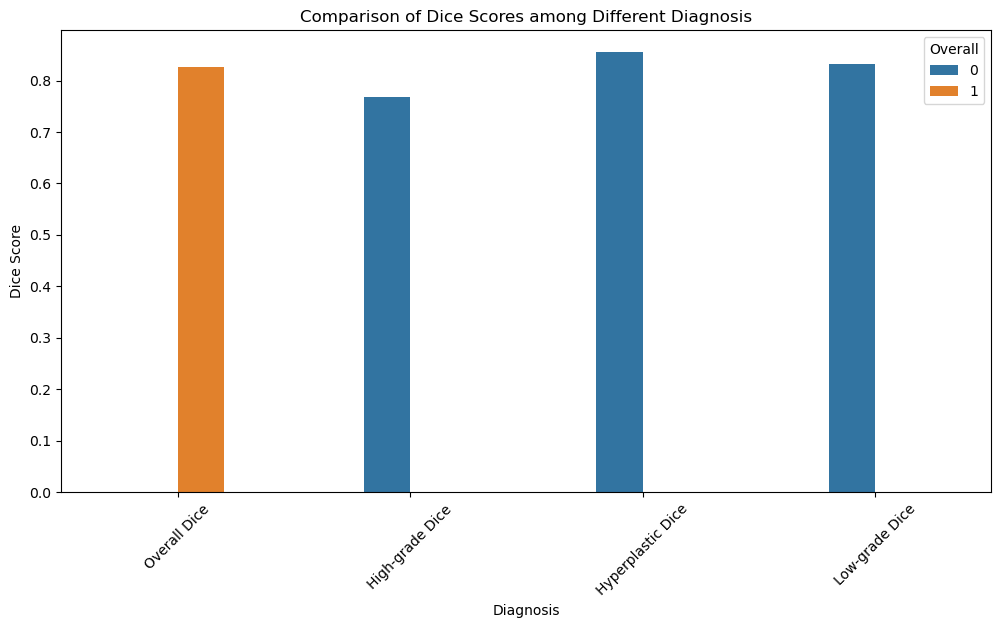

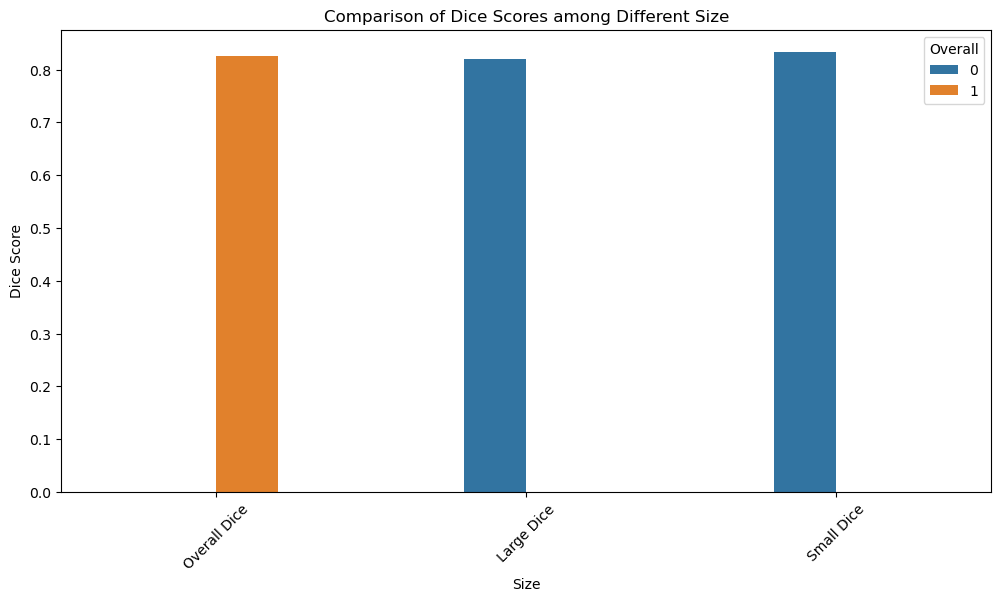

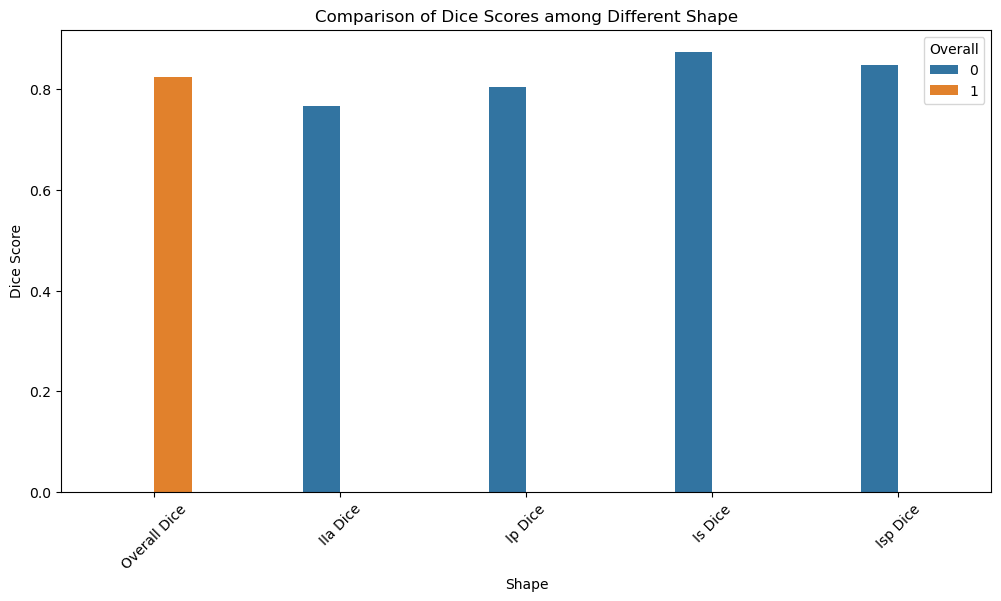

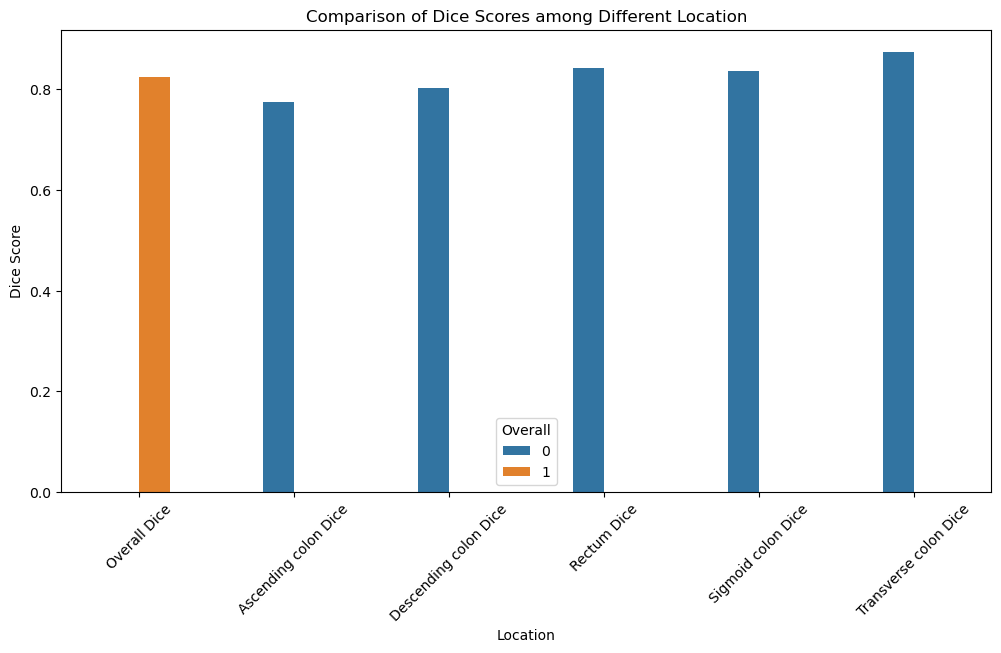

In [43]:
# lvisualize the fairness metrics in baseline model
baseline_output = pd.read_csv(baseline_output_path)
aug_output = pd.read_csv(aug_output_path)
sensitive_attributes = ["Diagnosis", "Size", "Shape", "Location"]
for attribute in sensitive_attributes:
    overall_dice_base, dice_per_attribute_base, ESSP_base = get_fairness_metrics(baseline_output, attribute)
    overall_dice, dice_per_attribute, ESSP = get_fairness_metrics(aug_output, attribute)
    # merge the dice_per_attribute_base and dice_per_attribute
    methods = ["Baseline", "Aug"]
    attrs = [attribute] * 2
    overall_dices = [overall_dice_base, overall_dice]
    ESSPs = [ESSP_base, ESSP]
    dicts = {"Attribute": attrs,  "Method": methods, "ES Dice": ESSPs,"Overall Dice": overall_dices, }
    dice_per_attributes = merge_series(dice_per_attribute_base, dice_per_attribute)
    final_dicts = {**dicts, **dice_per_attributes}
    fairness_metrics = pd.DataFrame(final_dicts)

    # 我们只需要方法和不同类型的 Dice 分数
    target_columns = ["Method", "Overall Dice"] + fairness_metrics.columns[4:].tolist()
    dice_data = fairness_metrics[target_columns]
    dice_data = dice_data.melt(id_vars=["Method"], var_name="Dice Type", value_name="Score")
    dice_data["Overall"] = dice_data["Dice Type"].apply(lambda x: 1 if "Overall" in x else 0)
    # 使用 seaborn 绘制条形图
    plt.figure(figsize=(12, 6))
    sns.barplot(data=dice_data.loc[dice_data["Method"] == "Baseline"], x='Dice Type', 
                y='Score', hue='Overall',  width=0.4)
    plt.title('Comparison of Dice Scores among Different {}'.format(attribute))
    plt.ylabel('Dice Score')
    plt.xticks(rotation=45)
    plt.xlabel('{}'.format(attribute))
    plt.show()


In [44]:
import re
# get the prediction result of the model
def get_prediction_result(pred_path, method):
    with open(pred_path, "r") as f:
        pred = f.read()
    dice_values = np.array(re.findall(r'dice is : (\d+\.\d+)', pred)).astype(float)
    # add the mean to the last row
    dice_values = np.append(dice_values, np.mean(dice_values))
    datasets = ["SUN-SEG_10_test", "Kvasir-SEG", "CVC-ClinicDB", "CVC-ColonDB", "ETIS-LaribPolypDB", "Overall"]
    methods = [method] * len(datasets)
    dicts = {"Dataset": datasets, "Method": methods, "Dice": dice_values}
    return pd.DataFrame(dicts)

# get the prediction result of the baseline model
baseline_pred_path = "logs_files/segmentation model testing/baseline.log"
aug_pred_path = "logs_files/segmentation model testing/basic_aug.log"

baseline_result = get_prediction_result(baseline_pred_path, "Baseline")
aug_result = get_prediction_result(aug_pred_path, "Aug")
combine_result = pd.concat([baseline_result, aug_result], axis=0)
# view the result
combine_result = combine_result.pivot(index="Method", columns="Dataset", values="Dice")

# reorder the columns
datasets = ["SUN-SEG_10_test", "Kvasir-SEG", "CVC-ClinicDB", "CVC-ColonDB", "ETIS-LaribPolypDB", "Overall"]
methods = ["Baseline", "Aug"]
combine_result = combine_result.reindex(columns=datasets, index=methods)
combine_result
# get the prediction result of the model


Dataset,SUN-SEG_10_test,Kvasir-SEG,CVC-ClinicDB,CVC-ColonDB,ETIS-LaribPolypDB,Overall
Method,,,,,,
Baseline,0.8254,0.8143,0.8358,0.8498,0.7781,0.8207
Aug,0.8484,0.8334,0.8506,0.8532,0.8313,0.8434
